In [1]:
import numpy as np
from skimage import io, color, filters, measure, img_as_ubyte
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

In [2]:
preSegment = np.load('./data/liutao/v1/pre-segmented.npy')
preSegment, num = measure.label(preSegment, connectivity=1, return_num=True)
print(num)

50335


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


float64


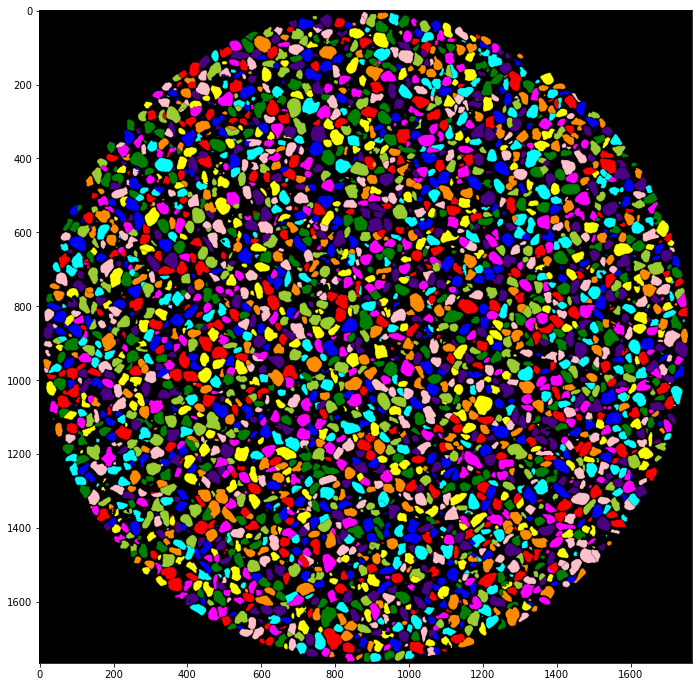

In [3]:
plt.figure(figsize=(16, 12))
img = color.label2rgb(preSegment[450], bg_label=0)
print(img.dtype)
plt.imshow(img)
io.imsave('/home/chuan/标记.png', img)

In [4]:
finalSegment = np.load('./data/liutao/v1/final-segmented.npy')
finalSegment, num = measure.label(finalSegment, connectivity=1, return_num=True)
print(num)

40870


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


float64


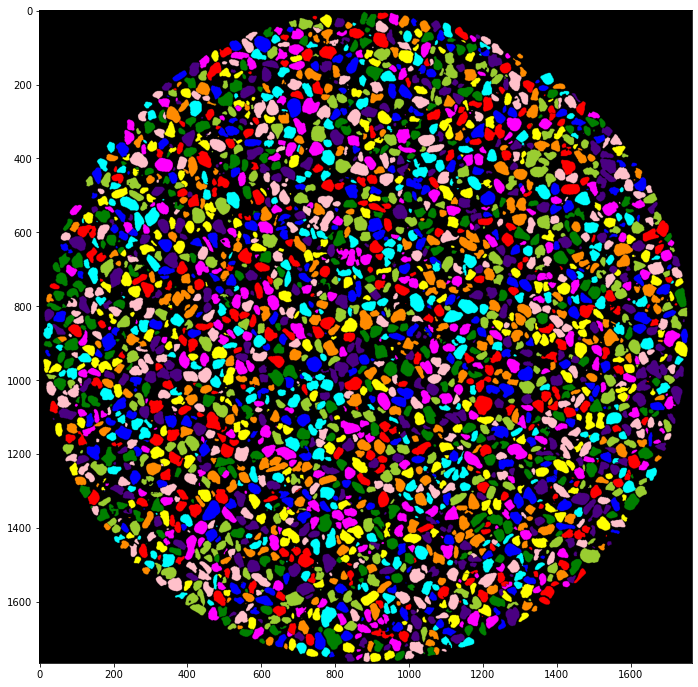

In [5]:
plt.figure(figsize=(16, 12))
img = color.label2rgb(finalSegment[450], bg_label=0)
print(img.dtype)
plt.imshow(img)
io.imsave('/home/chuan/标记-最终分割.png', img)

In [4]:
%gui qt
napari.view_labels(preSegment)

In [5]:
sandHeap._getCircleMask(ratio=0.2)
sandHeap.circleMask.shape

NameError: name 'sandHeap' is not defined

In [ ]:
preSegment[~sandHeap.circleMask] = 0
%gui qt
napari.view_labels(preSegment)

In [ ]:
sandHeap.removeBoundaryLabels(preSegment)
%gui qt
napari.view_labels(preSegment)